## 패키지 불러오기 (넘파이, 판다스 등)

In [16]:
import numpy as np
from scipy import stats
import pandas as pd
from sklearn.preprocessing import scale, minmax_scale, robust_scale
import statsmodels.api as sm
import seaborn as sns
from statsmodels.stats.proportion import proportions_ztest
from statsmodels.formula.api import ols
from statsmodels.api import qqplot, add_constant
import statsmodels.formula.api as smf
from statsmodels.tools.eval_measures import rmse
#다중공선성 확인
from statsmodels.stats.outliers_influence import variance_inflation_factor
#선형 회귀모형
from sklearn.linear_model import LinearRegression
#변수선택법 (후진제거법)
from sklearn.feature_selection import RFE
#스케일 변환 -> 표준화 회귀계수 산출
from sklearn.preprocessing import StandardScaler



import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
mpl.rcParams['axes.unicode_minus'] = False
font_location = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
font_name = fm.FontProperties(fname = font_location).get_name()
mpl.rc('font',family= font_name)
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

## 가공할 파일 불러오기 (read_csv) 및 대략적인 모양 확인

In [6]:
df_raw = pd.read_csv("/home/pirl/Statistics/Day3_0715/체질검사.csv", engine = "python", encoding="CP949")
df_raw.shape

(252, 14)

## 가공할 파일의 개략적인 정보 확인 (상단 5개 데이터 확인)

In [8]:
df_raw.head()

,FAT,AGE,WEIGHT,HEIGHT,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST
0,35.2,46,363.15,72.25,51.2,136.2,148.1,147.7,87.3,49.1,29.6,45.0,29.0,21.4
1,11.8,27,168.00,71.25,38.1,93.0,79.1,94.5,57.3,36.2,24.5,29.0,30.0,18.8
2,22.2,69,177.75,68.50,38.7,102.0,95.0,98.3,55.0,38.3,21.8,30.8,25.7,18.8
3,10.6,57,147.75,65.75,35.2,99.6,86.4,90.1,53.0,35.0,21.3,31.7,27.3,16.9
4,47.5,51,219.00,64.00,41.2,119.8,122.1,112.8,62.5,36.9,23.6,34.7,29.1,18.4


## 각 열마다 결측값이 없는지 확인하기 위해 isnull함수 사용

In [12]:
df_raw.isnull().sum()

FAT        0
AGE        0
WEIGHT     0
HEIGHT     0
NECK       0
CHEST      0
ABDOMEN    0
HIP        0
THIGH      0
KNEE       0
ANKLE      0
BICEPS     0
FOREARM    0
WRIST      0
dtype: int64

## 추가적으로 필요한 데이터(BMI)를 생성하기 위해 기존 데이터의 몸무게 단위 파운드를 KG으로, 키 단위 인치를, m로 변경해줌 
'WEIGHT' * 0.454 --> 'WEIGHT_KG' / 'HEIGHT' * 0.0254 --> 'HEIGHT_M'

In [26]:
df_raw['WEIGHT_KG'] = df_raw['WEIGHT']*0.454
df_raw['HEIGHT_M'] = df_raw['HEIGHT']*0.0254

df_raw.head()

,FAT,AGE,WEIGHT,HEIGHT,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST,WEIGHT_KG,HEIGHT_M,BMI
0,35.2,46,363.15,72.25,51.2,136.2,148.1,147.7,87.3,49.1,29.6,45.0,29.0,21.4,164.8701,1.83515,0.489552
1,11.8,27,168.00,71.25,38.1,93.0,79.1,94.5,57.3,36.2,24.5,29.0,30.0,18.8,76.2720,1.80975,0.232878
2,22.2,69,177.75,68.50,38.7,102.0,95.0,98.3,55.0,38.3,21.8,30.8,25.7,18.8,80.6985,1.73990,0.266573
3,10.6,57,147.75,65.75,35.2,99.6,86.4,90.1,53.0,35.0,21.3,31.7,27.3,16.9,67.0785,1.67005,0.240505
4,47.5,51,219.00,64.00,41.2,119.8,122.1,112.8,62.5,36.9,23.6,34.7,29.1,18.4,99.4260,1.62560,0.376247


## BMI 생성 공식대로 BMI 생성해줌
BMI = WEIGHT_KG / (HEIGHT_M)^2

In [28]:
df_raw['BMI'] = df_raw['WEIGHT_KG'] / (df_raw['HEIGHT_M']**2)

## 이상치 처리를 위해, BOXPLOT을 이용해 변수별로 분포 정도 확인

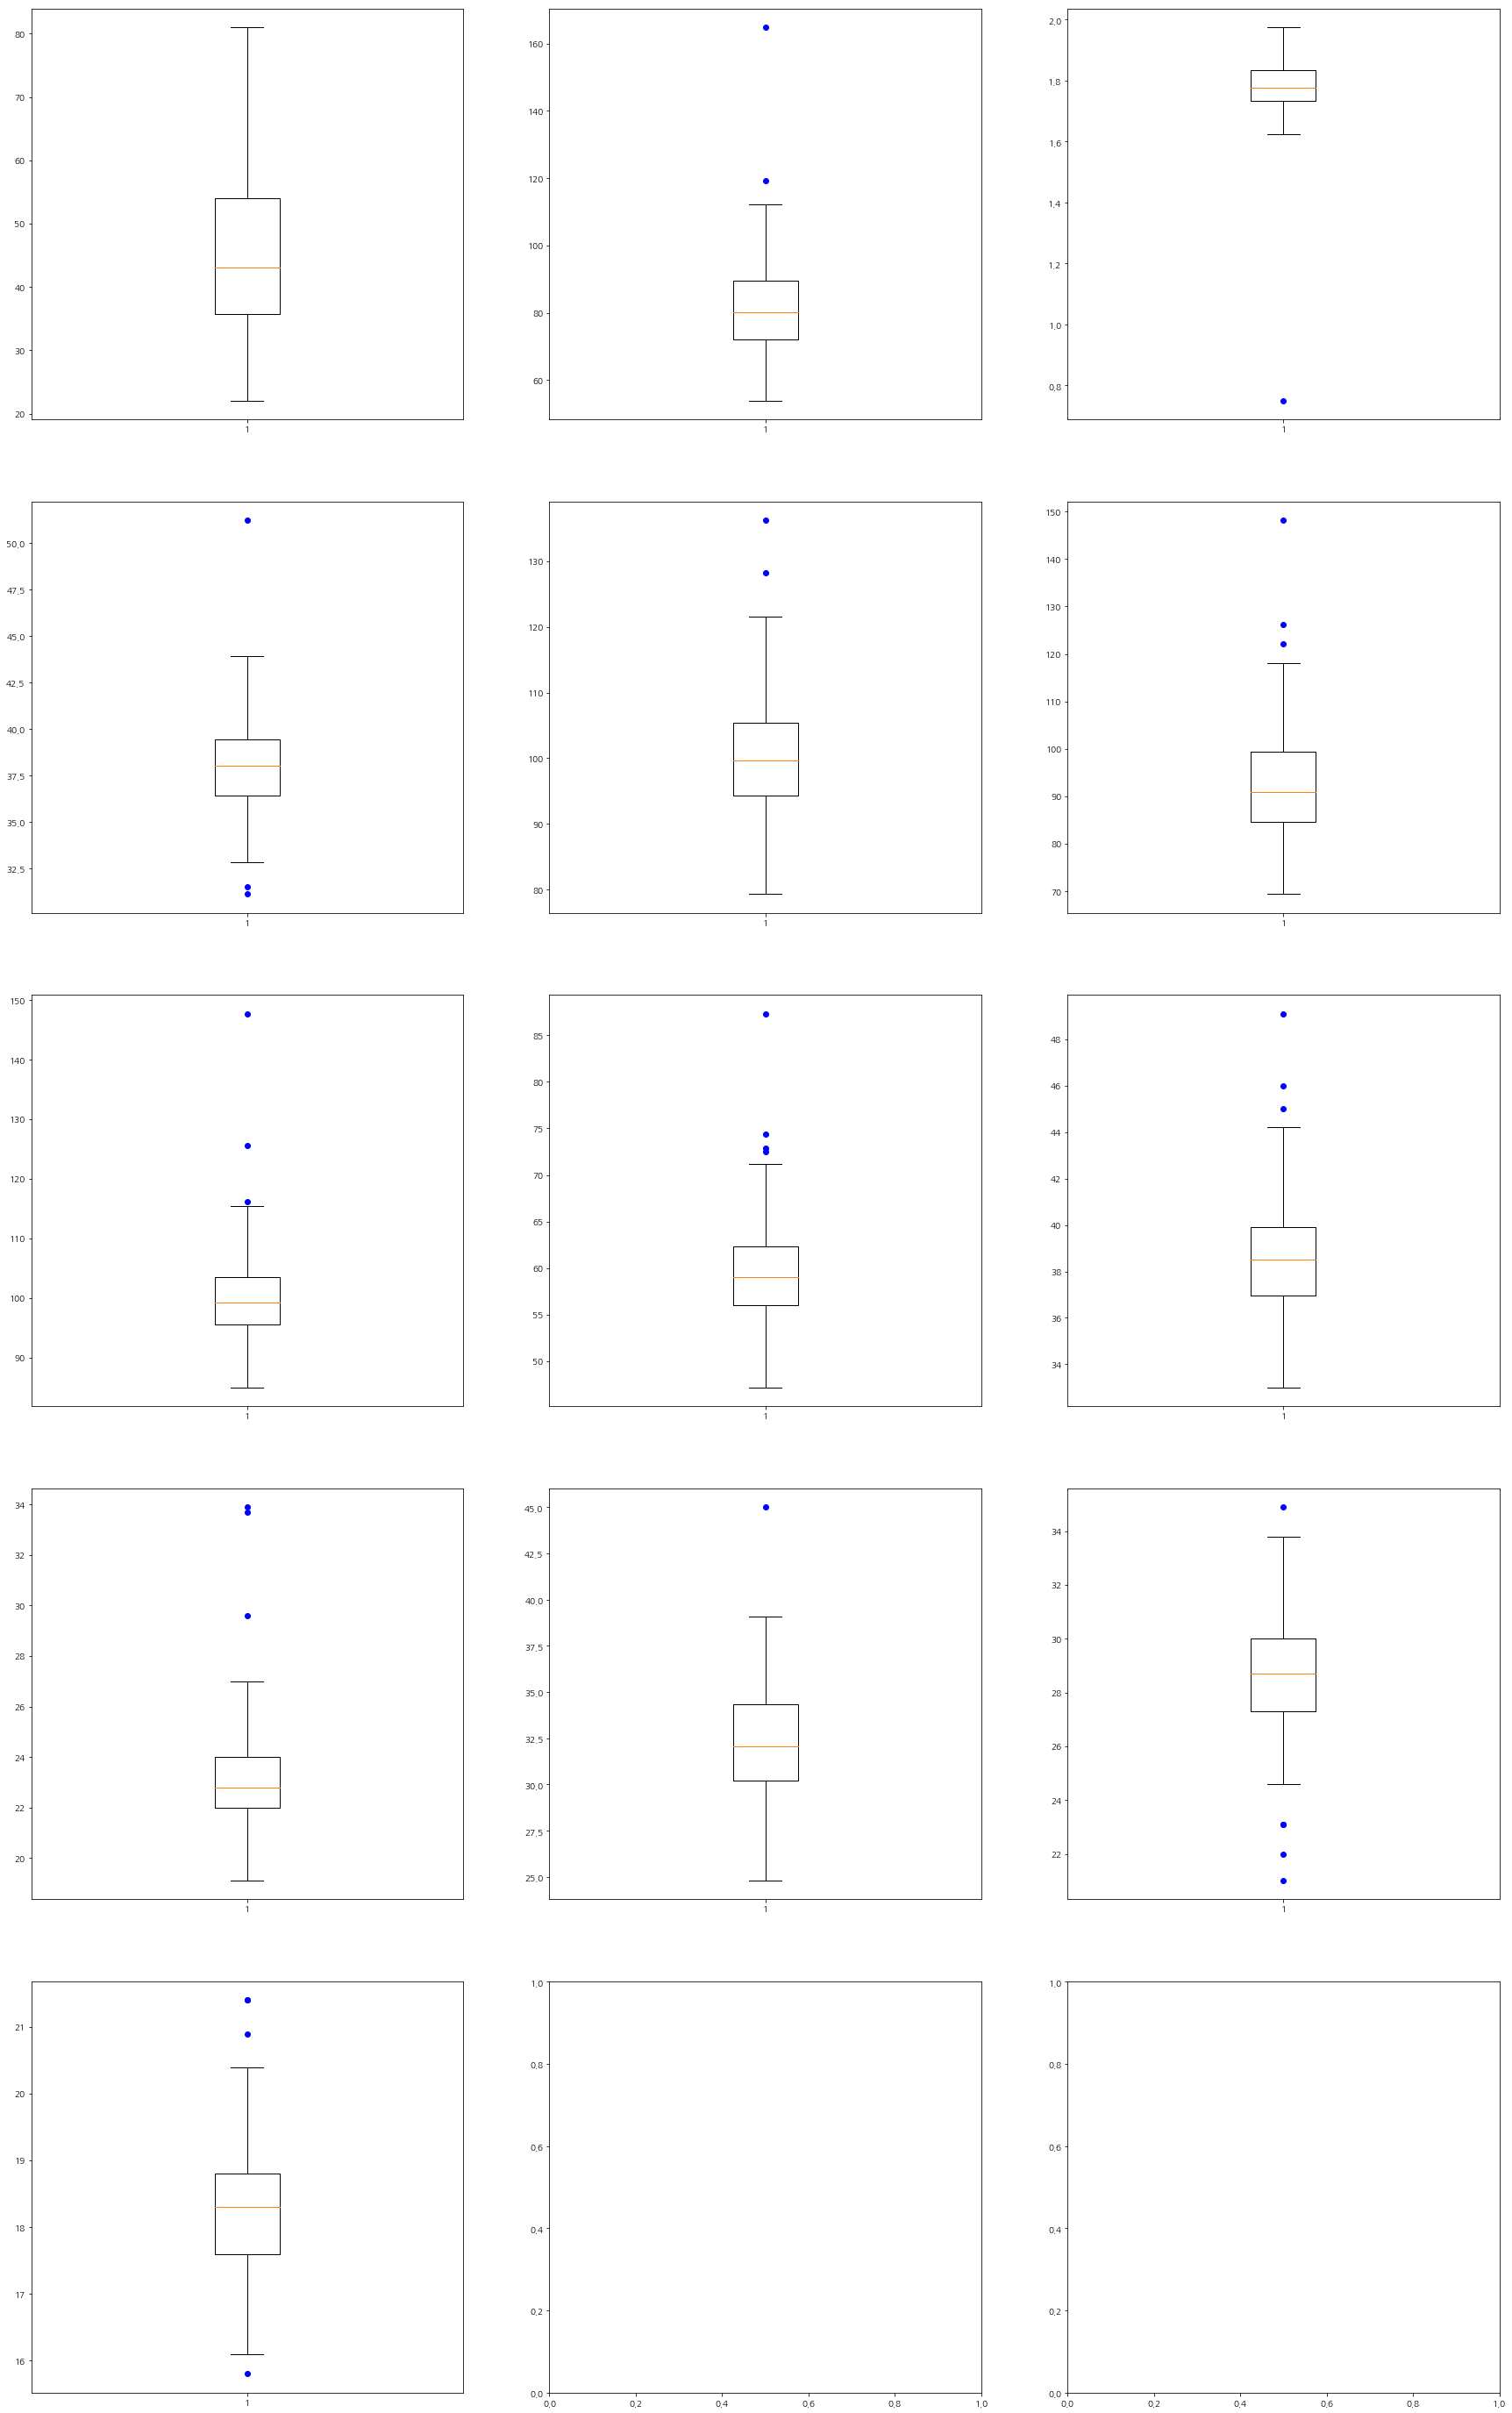

In [32]:
f, ax = plt.subplots(5, 3, figsize=(30, 50))
ax[0, 0].boxplot(df_raw['AGE'], sym="bo")
ax[0, 1].boxplot(df_raw['WEIGHT_KG'], sym="bo")
ax[0, 2].boxplot(df_raw['HEIGHT_M'], sym="bo")
ax[1, 0].boxplot(df_raw['NECK'], sym="bo")
ax[1, 1].boxplot(df_raw['CHEST'], sym="bo")
ax[1, 2].boxplot(df_raw['ABDOMEN'], sym="bo")
ax[2, 0].boxplot(df_raw['HIP'], sym="bo")
ax[2, 1].boxplot(df_raw['THIGH'], sym="bo")
ax[2, 2].boxplot(df_raw['KNEE'], sym="bo")
ax[3, 0].boxplot(df_raw['ANKLE'], sym="bo")
ax[3, 1].boxplot(df_raw['BICEPS'], sym="bo")
ax[3, 2].boxplot(df_raw['FOREARM'], sym="bo")
ax[4, 0].boxplot(df_raw['WRIST'], sym="bo")
plt.show()

# Q3 이상 넘어가는 이상치 처리를 위해, Q3 이상 값은 Q3 값으로 대체

In [34]:
for x in df_raw.columns:
    print(x)
    if x == 'Y' or x == 'GENDER':
        break
    else:
        a = np.percentile(df_raw[x],[25,75])
        l = a[1] + 1.5*(a[1]-a[0])
        df_raw[x][df_raw[x]>l] = l
        
df_raw

FAT
AGE
WEIGHT
HEIGHT
NECK
CHEST
ABDOMEN
HIP
THIGH
KNEE
ANKLE
BICEPS
FOREARM
WRIST
WEIGHT_KG
HEIGHT_M
BMI


,FAT,AGE,WEIGHT,HEIGHT,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST,WEIGHT_KG,HEIGHT_M,BMI
0,35.2000,46,254.00,72.25,43.9625,121.9125,121.45,115.5625,71.875,44.35,27.0,40.5125,29.0,20.6,115.3160,1.83515,33.813264
1,11.8000,27,168.00,71.25,38.1000,93.0000,79.10,94.5000,57.300,36.20,24.5,29.0000,30.0,18.8,76.2720,1.80975,23.287773
2,22.2000,69,177.75,68.50,38.7000,102.0000,95.00,98.3000,55.000,38.30,21.8,30.8000,25.7,18.8,80.6985,1.73990,26.657345
3,10.6000,57,147.75,65.75,35.2000,99.6000,86.40,90.1000,53.000,35.00,21.3,31.7000,27.3,16.9,67.0785,1.67005,24.050516
4,44.5375,51,219.00,64.00,41.2000,119.8000,121.45,112.8000,62.500,36.90,23.6,34.7000,29.1,18.4,99.4260,1.62560,33.813264
5,24.2000,40,202.25,70.00,38.5000,106.5000,100.90,106.2000,63.500,39.90,22.6,35.1000,30.6,19.0,91.8215,1.77800,29.045635
6,23.3000,52,167.00,67.75,37.5000,102.7000,91.00,98.9000,57.100,36.70,22.3,31.6000,27.5,17.9,75.8180,1.72085,25.602731
7,26.0000,54,230.00,72.25,42.5000,119.9000,110.40,105.5000,64.200,42.70,27.0,38.4000,32.0,19.6,104.4200,1.83515,31.005629
8,9.0000,47,184.25,74.50,37.3000,99.6000,88.80,101.4000,57.400,39.60,24.6,30.3000,27.9,17.8,83.6495,1.89230,23.360567
9,4.0000,47,127.50,66.75,34.0000,83.4000,70.40,87.2000,50.600,34.40,21.9,26.8000,25.8,16.8,57.8850,1.69545,20.137060


## FAT과 변수간의 상관관계를 퀵하게 확인하기 위해 상관분석 실시

In [35]:
df_raw.corr(method = "pearson").round(3)

,FAT,AGE,WEIGHT,HEIGHT,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST,WEIGHT_KG,HEIGHT_M,BMI
FAT,1.000,0.292,0.627,-0.088,0.492,0.707,0.828,0.646,0.565,0.509,0.308,0.493,0.366,0.341,0.627,-0.088,0.751
AGE,0.292,1.000,-0.015,-0.172,0.118,0.182,0.240,-0.058,-0.210,0.013,-0.141,-0.043,-0.083,0.215,-0.015,-0.172,0.123
WEIGHT,0.627,-0.015,1.000,0.323,0.811,0.893,0.877,0.931,0.855,0.851,0.706,0.793,0.679,0.724,1.000,0.323,0.872
HEIGHT,-0.088,-0.172,0.323,1.000,0.259,0.137,0.087,0.180,0.149,0.289,0.310,0.209,0.230,0.329,0.323,1.000,-0.082
NECK,0.492,0.118,0.811,0.259,1.000,0.772,0.731,0.700,0.666,0.650,0.535,0.715,0.658,0.740,0.811,0.259,0.749
CHEST,0.707,0.182,0.893,0.137,0.772,1.000,0.911,0.821,0.712,0.711,0.548,0.718,0.597,0.644,0.893,0.137,0.908
ABDOMEN,0.828,0.240,0.877,0.087,0.731,0.911,1.000,0.860,0.745,0.724,0.512,0.669,0.527,0.601,0.877,0.087,0.912
HIP,0.646,-0.058,0.931,0.180,0.700,0.821,0.860,1.000,0.889,0.832,0.634,0.730,0.596,0.608,0.931,0.180,0.865
THIGH,0.565,-0.210,0.855,0.149,0.666,0.712,0.745,0.889,1.000,0.792,0.635,0.749,0.597,0.541,0.855,0.149,0.805
KNEE,0.509,0.013,0.851,0.289,0.650,0.711,0.724,0.832,0.792,1.000,0.710,0.665,0.579,0.661,0.851,0.289,0.719


## 상관분석 진행 이후, 산점도로 상관성 확인

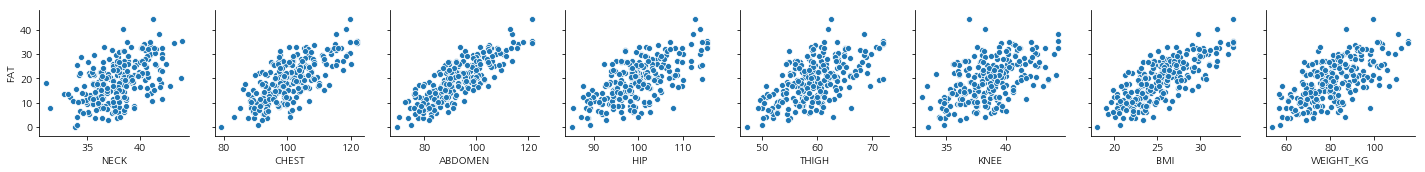

In [37]:
sns.pairplot(df_raw, y_vars='B', x_vars=['NECK','CHEST','ABDOMEN','HIP','THIGH','KNEE','BMI','WEIGHT_KG'])

## 독립변수간의 독립성을 파악하고, 회귀식의 전제에 일치할 수 있도록, 다중공선성 확인하여 독립변수간 공선성이 높은 변수는 제거하여 회귀분석실시
추가적으로, 신규 생성한 HEIGHT/WEIGHT는 변환 수치와 완벽하게 동일하므로, 분석 시 제외

In [40]:
# 설명변수 간의 다중공선성 확인 : 설명 변수 데이터 생서 및 상수항 추가
df_raw_x=df_raw.drop(["FAT","HEIGHT","WEIGHT"],axis=1)
#statsmodels의 상수항 추가 함수 적용
df_raw_x_const=add_constant(df_raw_x)
#DataFrame으로 저장
df_vif = pd.DataFrame()
df_vif["variable"] = df_raw_x_const.columns
df_vif["VIF"] = [variance_inflation_factor(df_raw_x_const.values, i) for i in range(df_raw_x_const.shape[1])]

df_vif.sort_values("VIF", inplace=True)
df_vif.round(3)

,variable,VIF
1,AGE,2.298
10,FOREARM,2.402
8,ANKLE,2.812
13,HEIGHT_M,3.252
9,BICEPS,3.558
11,WRIST,3.607
2,NECK,4.157
7,KNEE,4.851
6,THIGH,7.520
3,CHEST,11.221


## 다중공선성 높은 변수 제거
BMI는 HEIGHT와 WEIGHT로 만들어진 변수이므로, HEIGHT/WEIGHT를 먼저 제거

In [46]:
# 설명변수 간의 다중공선성 확인 : 설명 변수 데이터 생서 및 상수항 추가
df_raw_x=df_raw.drop(["FAT","HEIGHT","WEIGHT", "WEIGHT_KG", "HEIGHT_M", "ABDOMEN"],axis=1)
#statsmodels의 상수항 추가 함수 적용
df_raw_x_const=add_constant(df_raw_x)
#DataFrame으로 저장
df_vif = pd.DataFrame()
df_vif["variable"] = df_raw_x_const.columns
df_vif["VIF"] = [variance_inflation_factor(df_raw_x_const.values, i) for i in range(df_raw_x_const.shape[1])]

df_vif.sort_values("VIF", inplace=True)
df_vif.round(3)

,variable,VIF
1,AGE,1.809
9,FOREARM,2.349
7,ANKLE,2.646
8,BICEPS,3.386
10,WRIST,3.440
2,NECK,3.780
6,KNEE,4.570
3,CHEST,7.379
5,THIGH,7.480
4,HIP,8.751


## 다중공선성 먼저 제외한 후, 회귀분석 실시

In [48]:
reg_model = smf.ols(formula = "FAT ~ AGE+FOREARM+ANKLE+BICEPS+WRIST+NECK+KNEE+CHEST+THIGH+HIP+BMI", data=df_raw)
reg_result = reg_model.fit()
print(reg_result.summary())

                            OLS Regression Results                            
Dep. Variable:                    FAT   R-squared:                       0.659
Model:                            OLS   Adj. R-squared:                  0.643
Method:                 Least Squares   F-statistic:                     42.11
Date:                Tue, 16 Jul 2019   Prob (F-statistic):           7.02e-50
Time:                        19:11:58   Log-Likelihood:                -755.84
No. Observations:                 252   AIC:                             1536.
Df Residuals:                     240   BIC:                             1578.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -20.5094      8.580     -2.390      0.0

## 회귀식에 유의하지 않은 순서대로, 변수 제거하여 회귀식 계산

## 회귀식은 FAT = 0.1894 AGE - 2.5147 WRIST + 0.3424 HIP + 1.6467 BMI -19.4242

In [66]:
reg_model = smf.ols(formula = "FAT ~ AGE+WRIST+HIP+BMI", data=df_raw)
reg_result = reg_model.fit()
print(reg_result.summary())

                            OLS Regression Results                            
Dep. Variable:                    FAT   R-squared:                       0.651
Model:                            OLS   Adj. R-squared:                  0.646
Method:                 Least Squares   F-statistic:                     115.3
Date:                Tue, 16 Jul 2019   Prob (F-statistic):           2.51e-55
Time:                        19:15:11   Log-Likelihood:                -758.54
No. Observations:                 252   AIC:                             1527.
Df Residuals:                     247   BIC:                             1545.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -19.4242      7.949     -2.443      0.0

## 완성된 회귀식의 등분산성/정규성/독립성을 검정하기 위해 아래와 같이 분석함,

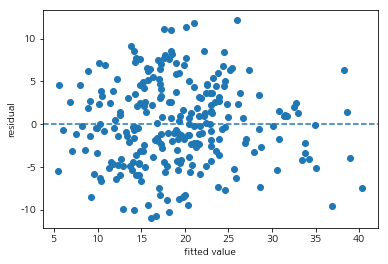

In [67]:
# 등분산성 검정
plt.scatter(reg_result.fittedvalues, reg_result.resid)
plt.xlabel("fitted value"); plt.ylabel("residual")
plt.axhline(y=0, linestyle = "--")

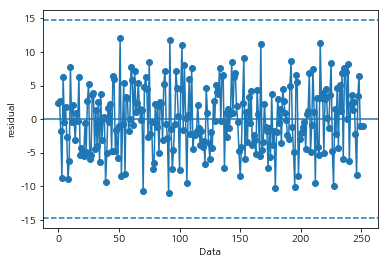

In [69]:
# 독립성 검정
plt.plot(df_raw.index, reg_result.resid, marker="o")
plt.xlabel("Data")
plt.ylabel("residual")
plt.axhline(y=0, linestyle = "-")
plt.axhline(y=3*np.std(reg_result.resid), linestyle = "--")
plt.axhline(y=-3*np.std(reg_result.resid), linestyle = "--")

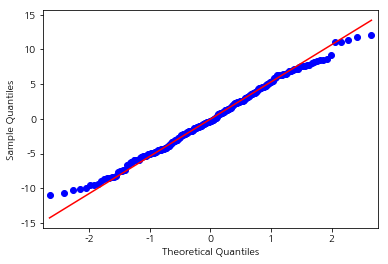

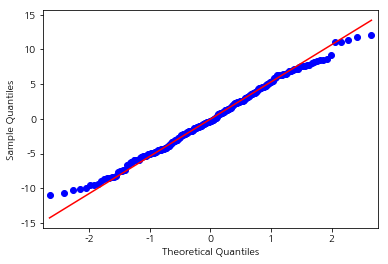

In [70]:
#정규성 검정
qqplot(reg_result.resid, line="q")

## 잔차 분석 결과, 등분산성/정규성/독립성을 만족하며, 해당 회귀식은 통계적으로 유의하다, 또한, 설명력은 64.6%수준으로 나타났다. 

## 아래와 같이, BMI 수치와 체질적인 비만도와 양의 인과관계가 크게 나타났고, 손몬 두께와 체질적인 비만도는 음의 인과관계를 나타냈다.

## BMI 수치 1 증가 마다, 체질적 비만도 1.64 증가, 손목 둘레가 1 증가할 수록 체질적 비만도 2.5147 감소하는 것으로 나타난다.

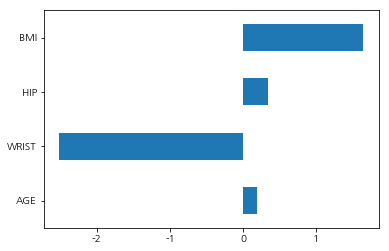

In [71]:
df_reg_coef = pd.DataFrame({"Coef":reg_result.params.values[1:]}, index = ["AGE","WRIST","HIP","BMI"])
df_reg_coef.plot.barh(y="Coef", legend=False)